<br>
<h2 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Breast Cancer: Analysis and Logistic Regression
</h2>
<br>
<div class='image'>
    <img style="float:center; width:100%; border:5px solid #FF7043;" align="center" src="https://media2.wnyc.org/i/620/372/c/80/1/shutterstock_184214636.jpg">
</div>
<br>
<be>


<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Introduction
</h6>

- This dataset contains features computed from digitized images of breast mass fine needle aspirates (FNA). It includes attributes like radius, texture, perimeter, area, and more, to describe cell nuclei characteristics. The goal is to build a logistic regression model to predict whether a tumor is malignant or benign based on these features. This analysis aims to provide a reliable tool for early breast cancer diagnosis.

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Objectives
</h6>

<p>
    The primary objectives of this notebook are as follows:
    <ol>
        <li>Load the data to familiarize ourselves with its structure and contents.</li>
        <li>Conduct exploratory data analysis (EDA) to gain insights into the data distribution, identify patterns, and visualize key features.</li>
        <li>Clean the data by handling missing values, standardizing the features, and preparing it for modeling.</li>
        <li>Build and evaluate a logistic regression model to predict whether a tumor is malignant or benign, providing a reliable tool for early breast cancer diagnosis.</li>
    </ol>
</p>


<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    import libraries
</h6>

In [359]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, 
                             PrecisionRecallDisplay, roc_curve, RocCurveDisplay, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Load the data
</h6>

In [360]:
df = pd.read_csv(r'Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Exploratory Data Analysis
</h6>

In [361]:
# look at the dataset summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [362]:
# look at the dataset summary statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [363]:
# look at the data types of the columns 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [364]:
# look at the columns names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [365]:
# check for missing values (only the "Unnamed: 32" column has missing values)
for column in df.columns:
    if df[column].isnull().sum() > 0:
        print(column, df[column].isna().sum())

Unnamed: 32 569


In [366]:
# ckeck for any non-numeric columns (only the "diagnosis" column is non-numeric)
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
    elif df[column].dtype == 'catgeory':
        print(column)
    elif df[column].dtype == 'bool':
        print(column)

diagnosis


In [367]:
# check for any duplicate rows (no duplicate rows)
df.duplicated().sum()

0

In [368]:
# ckheck for any duplicate columns (no duplicate columns)
df.T.duplicated().sum()

0

In [369]:
# check for datarame shape (569 rows, 33 columns)
df.shape

(569, 33)

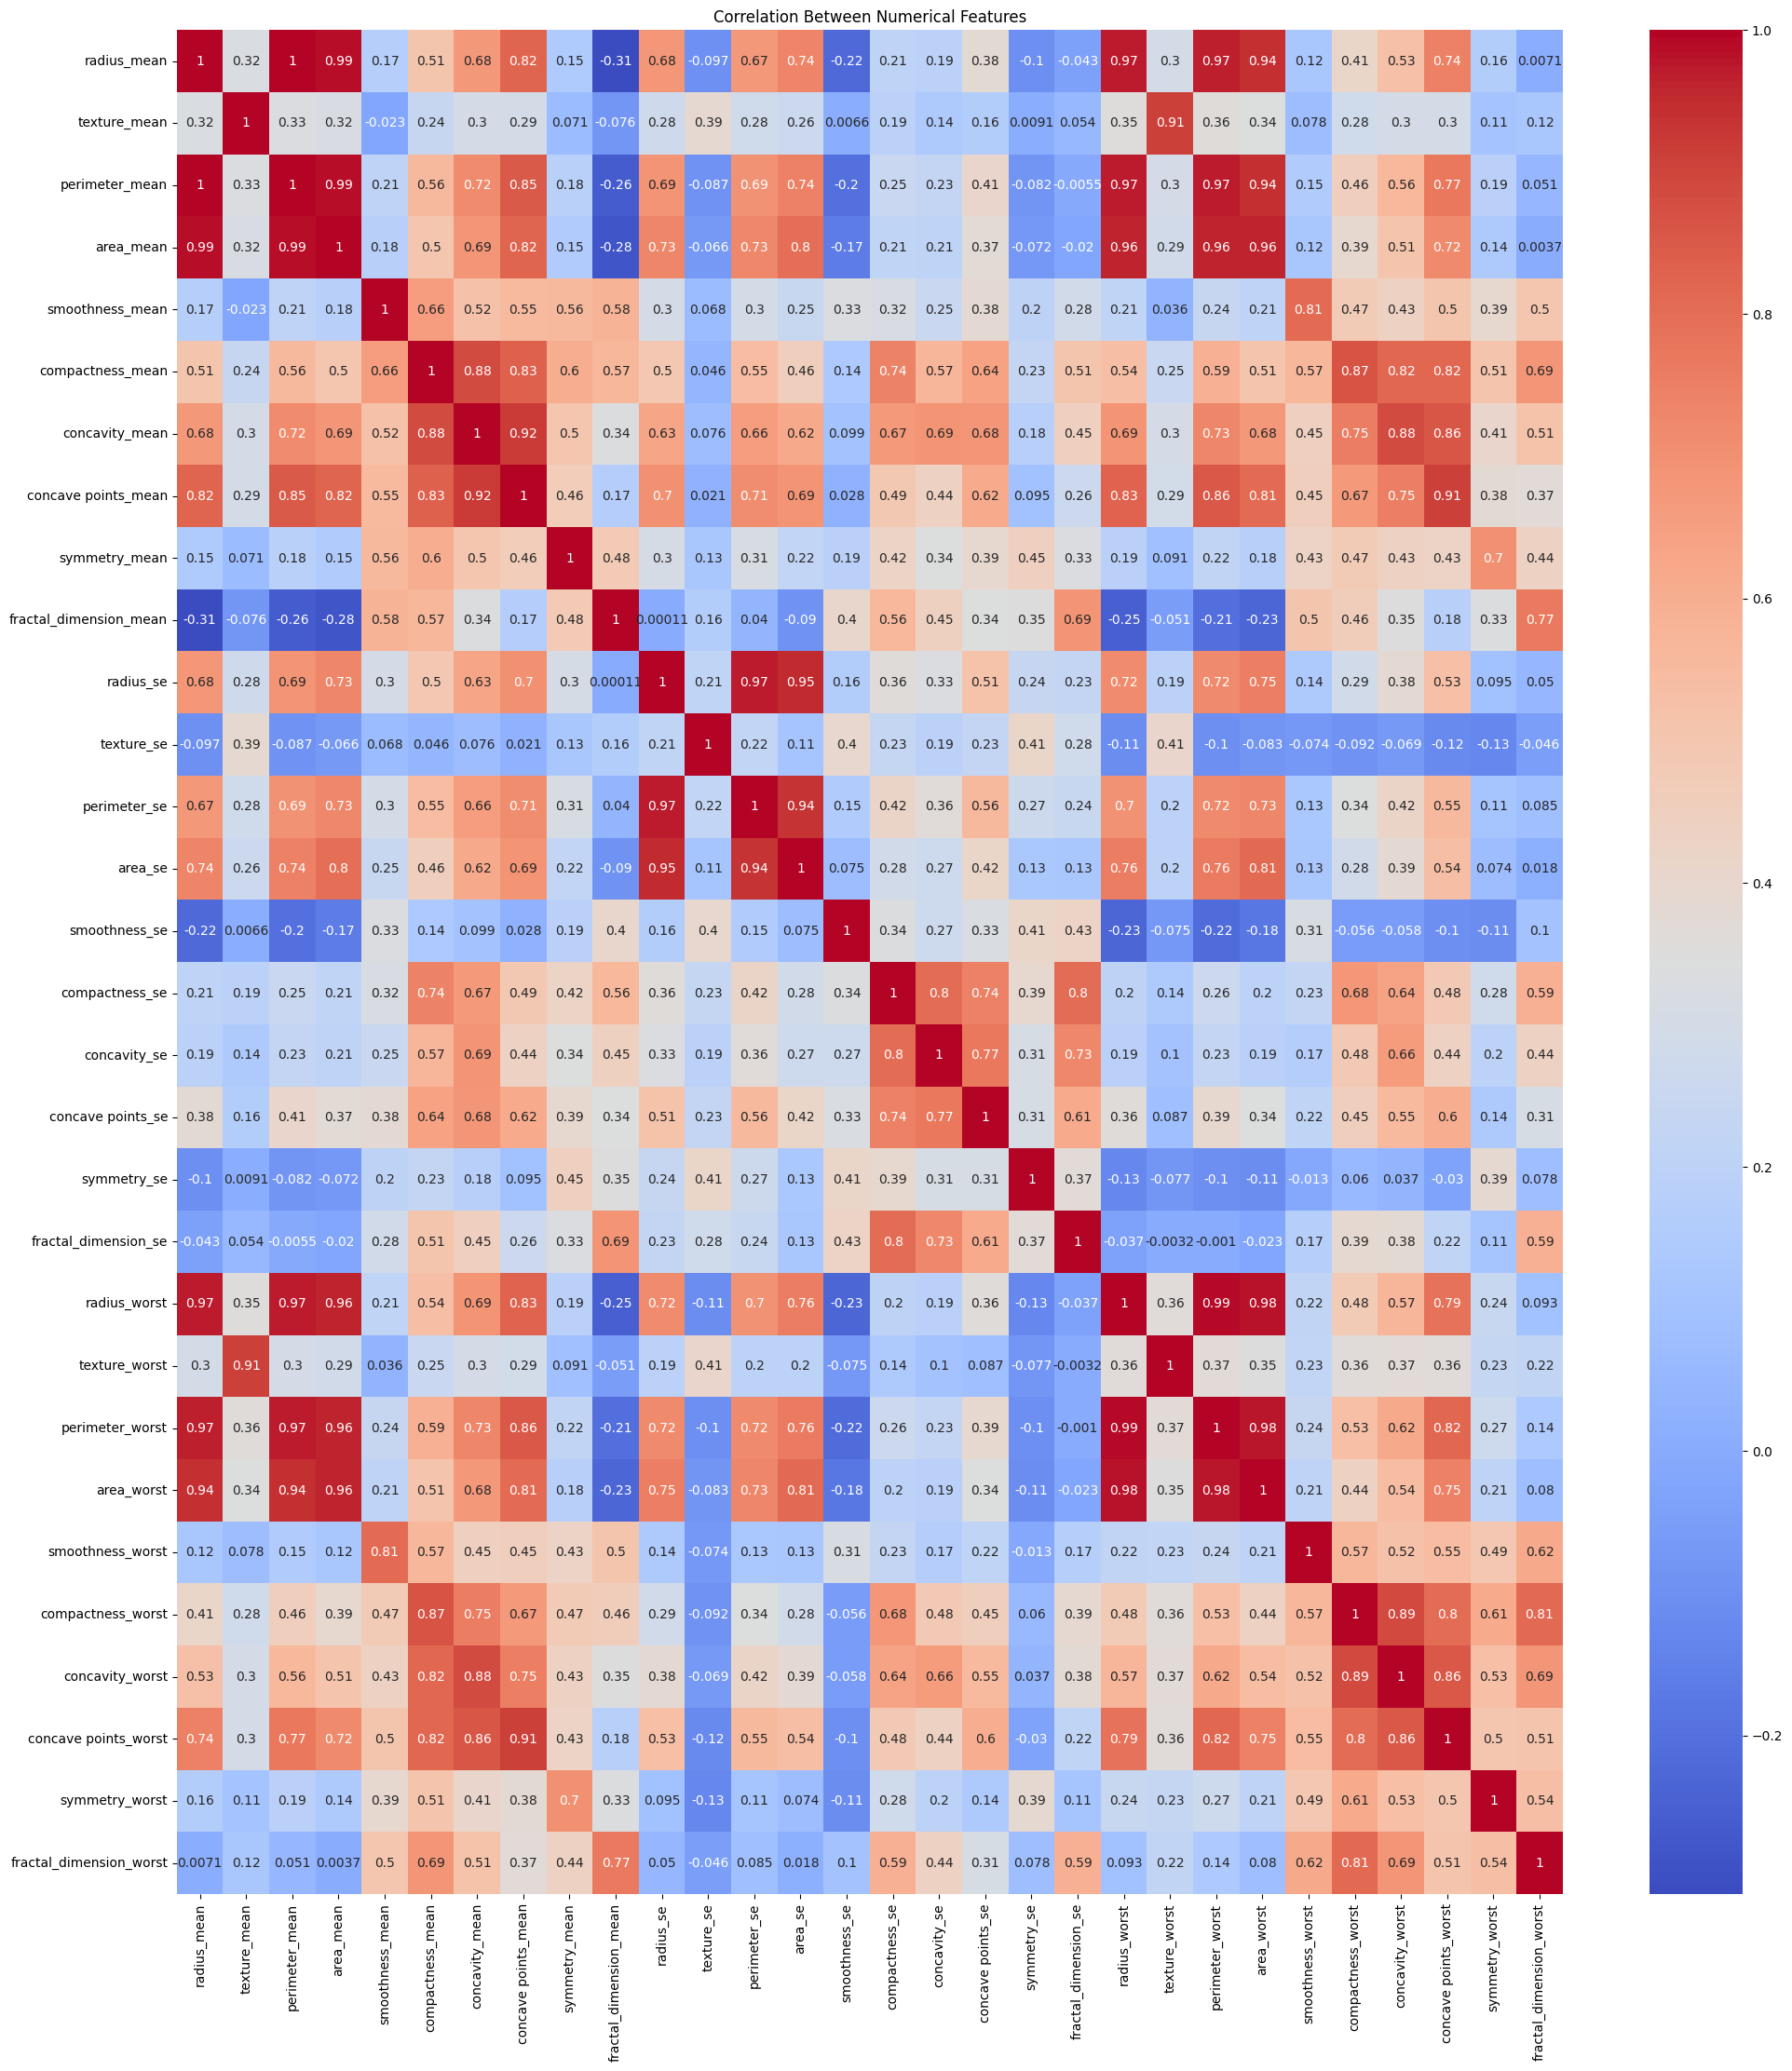

In [370]:
# check for the correlation between the numerical features using seaborn heatmap
plt.figure(figsize=(24, 26))
sns.heatmap(df.iloc[:, 2:-1].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

<p>
    In the Diagnosis column of the breast cancer dataset:
    <ul>
        <li><span style="font-size:20px; color:#FF0000;"><b>M</b></span> stands for <span style="font-size:20px; color:#FF0000;"><b>Malignant</b></span>. It indicates that the tumor is cancerous and has the potential to spread to other parts of the body.</li>
        <li><span style="font-size:20px; color:#00BFFF;"><b>B</b></span> stands for <span style="font-size:20px; color:#00BFFF;"><b>Benign</b></span>. It indicates that the tumor is not cancerous and does not spread to other parts of the body.</li>
    </ul>
</p>


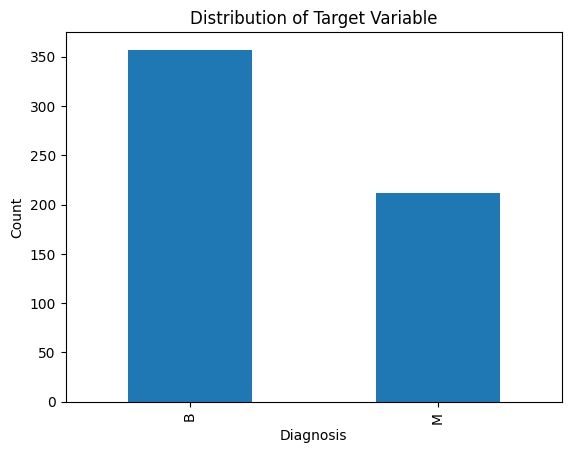

In [371]:
# check for the distributed of the target variable 
df['diagnosis'].value_counts().plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Data Cleaning
</h6>

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Managing Missing Values
</h6>

In [372]:
# drop the "id", "Unnamed: 32" columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [373]:
# check for missing values
num = 0
for column in df.columns:
    if df[column].isnull().sum() > 0:
        print(column, df[column].isna().sum())
        num += 1

if num == 0:
    print("no missing values")
else:
    print("there are missing values")

no missing values


<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Handling Outliers
</h6>

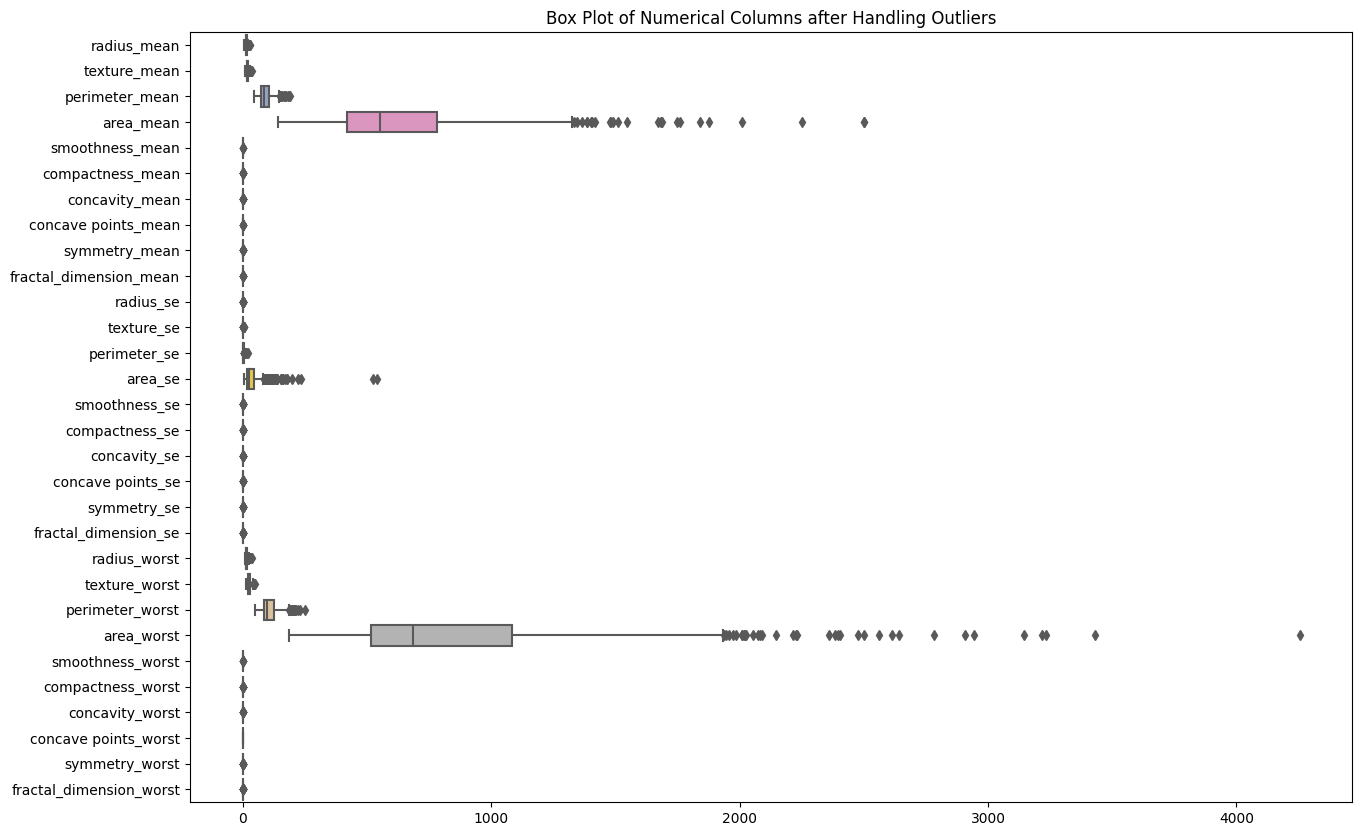

In [374]:
# check for outlayers in the numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Box plot of numerical columns Before handling outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title('Box Plot of Numerical Columns after Handling Outliers')
plt.show()

In [375]:
# Handling Extreme outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to all numerical columns
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df = handle_outliers(df, col)

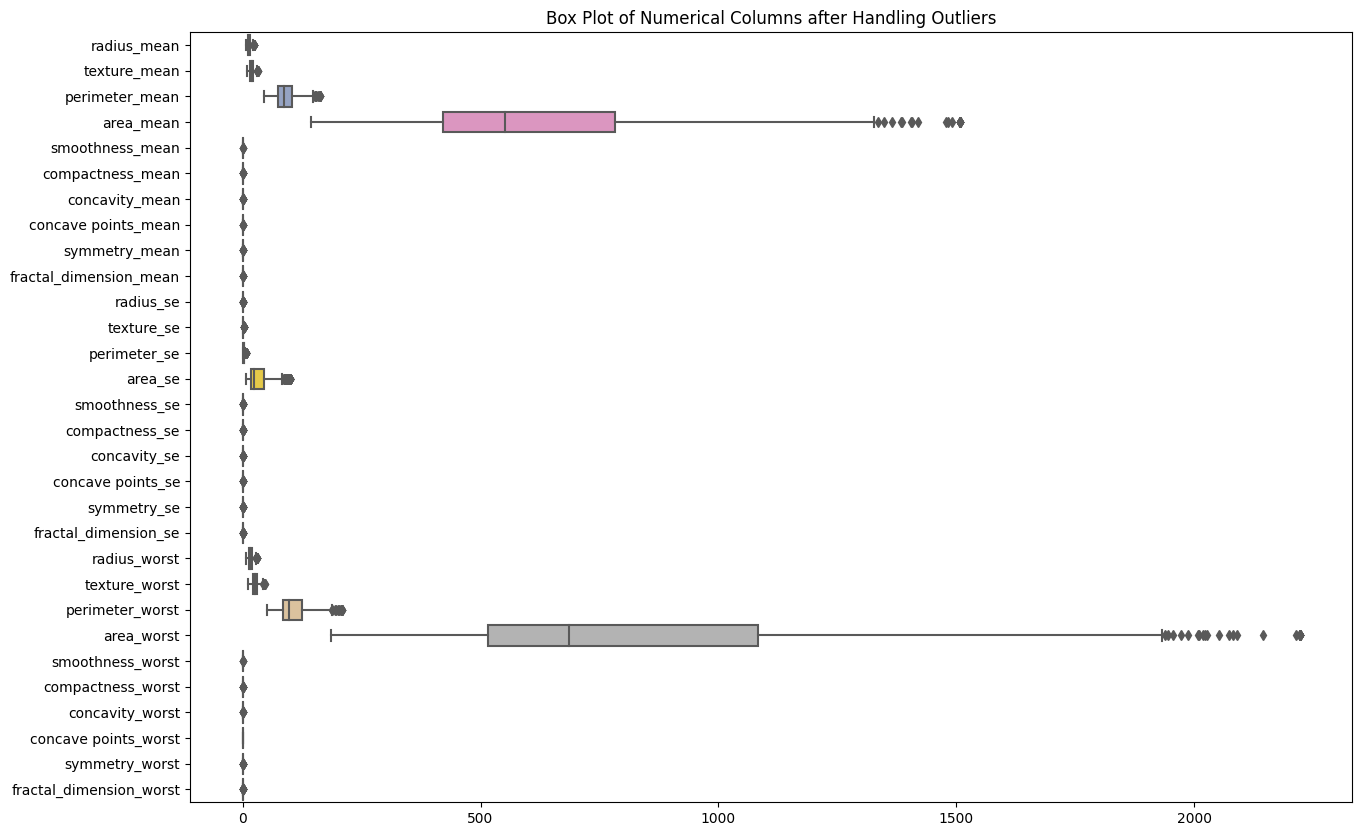

In [376]:
# we can see the x-axis range has been reduced after handling outliers
numerical_cols = df.select_dtypes(include='number').columns

# Box plot of numerical columns after handling outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title('Box Plot of Numerical Columns after Handling Outliers')
plt.show()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Handling Data Types
</h6>

In [377]:
# check for the sum of memory usage
df.memory_usage().sum()

141240

In [378]:
# reduce the memory usage by converting the data types of the columns
for col in df.columns:
    if df[col].dtype == 'int64':
        if df[col].min() > np.iinfo(np.int8).min and df[col].max() < np.iinfo(np.int8).max:
            df[col] = df[col].astype(np.int8)
        elif df[col].min() > np.iinfo(np.int16).min and df[col].max() < np.iinfo(np.int16).max:
            df[col] = df[col].astype(np.int16)
        elif df[col].min() > np.iinfo(np.int32).min and df[col].max() < np.iinfo(np.int32).max:
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)
    elif df[col].dtype == 'float64':
        if df[col].min() > np.finfo(np.float16).min and df[col].max() < np.finfo(np.float16).max:
            df[col] = df[col].astype(np.float16)
        elif df[col].min() > np.finfo(np.float32).min and df[col].max() < np.finfo(np.float32).max:
            df[col] = df[col].astype(np.float32)
        else:
            df[col] = df[col].astype(np.float64)

In [379]:
# check for the sum of memory usage (we can see that the memory usage has been reduced)
df.memory_usage().sum()

38820

<Axes: xlabel='diagnosis'>

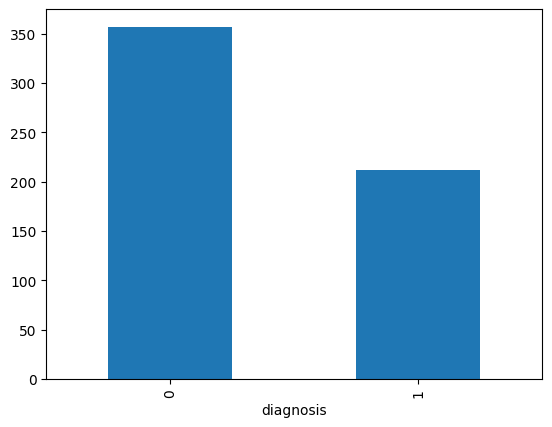

In [380]:
# convert the target variable to numerical "diagnosis"
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].value_counts().plot(kind="bar")

In [381]:
# now we see there is no missing values and all columns are numerical (the data is ready for modeling)
df.shape

(569, 31)

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Modeling: Logistic Regression
</h6>

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Dividing into features and target variable
</h6>

In [382]:
# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [383]:
# print the X columns (features)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.984375,10.382812,122.8125,1001.0,0.118408,0.261475,0.300049,0.147095,0.241943,0.078735,...,25.375000,17.328125,184.625,2019.0,0.162231,0.665527,0.711914,0.265381,0.452881,0.118896
1,20.562500,17.765625,132.8750,1326.0,0.084717,0.078613,0.086914,0.070190,0.181152,0.056671,...,24.984375,23.406250,158.750,1956.0,0.123779,0.186646,0.241577,0.186035,0.274902,0.089050
2,19.687500,21.250000,130.0000,1203.0,0.109619,0.159912,0.197388,0.127930,0.206909,0.059998,...,23.562500,25.531250,152.500,1709.0,0.144409,0.424561,0.450439,0.243042,0.361328,0.087585
3,11.421875,20.375000,77.5625,386.0,0.142456,0.261475,0.241455,0.105225,0.259766,0.082947,...,14.906250,26.500000,98.875,567.5,0.204834,0.722656,0.687012,0.257568,0.452881,0.133301
4,20.296875,14.343750,135.1250,1297.0,0.100281,0.132812,0.197998,0.104309,0.180908,0.058838,...,22.546875,16.671875,152.250,1575.0,0.137451,0.204956,0.399902,0.162476,0.236450,0.076782


In [384]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Standardize the Features
</h6>

In [385]:
# standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Split the Data
</h6>

In [386]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Train the Model
</h6>

In [387]:
# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [388]:
# Predict on the test set
y_pred = model.predict(X_test)
y_scores = model.decision_function(X_test)  # Decision function for ROC and PR curves

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Model Evaluation
</h6>

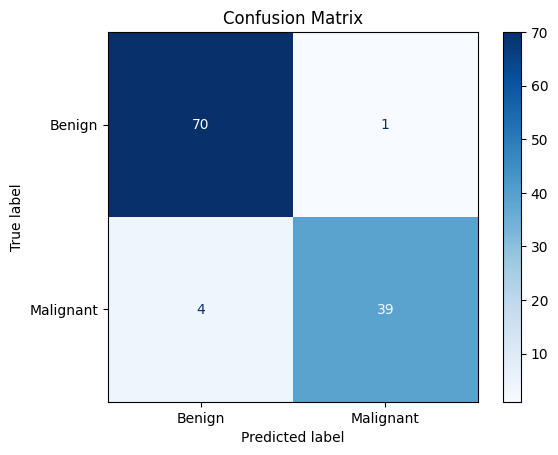

In [389]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp_cm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

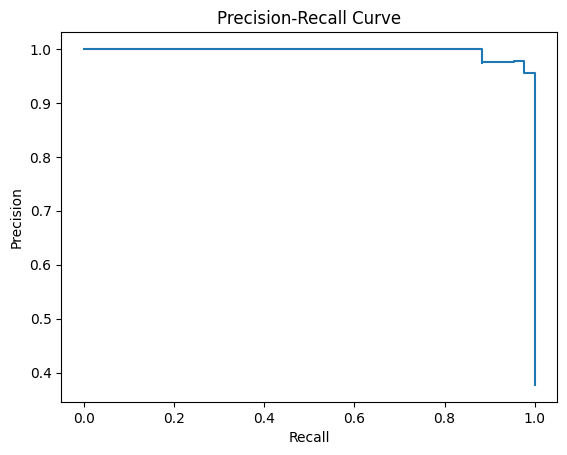

In [390]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
disp_pr = PrecisionRecallDisplay(precision=precision, recall=recall)
disp_pr.plot()
plt.title("Precision-Recall Curve")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


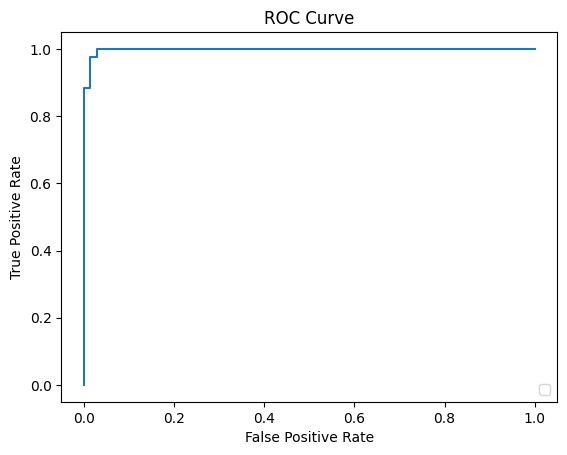

In [391]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
disp_roc = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp_roc.plot()
plt.title("ROC Curve")
plt.show()

In [392]:
# Classification Report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        71
   Malignant       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [394]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.97
Recall: 0.91
F1 Score: 0.94
